# Homework 6 solutions

## Harmonic oscillator Hamiltonian

(a) First check what happens to the Hamiltonian and pseudo-Hamiltonian when we make an update:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [2]:
import sympy.matrices
from sympy.printing import pprint
# declare the step size h as a symbol
h = sympy.Symbol('h')

In [3]:
def J_leapfrog(h):
    a = sympy.matrices.Matrix([[1,0],[-h/2,1]])
    b = sympy.matrices.Matrix([[1,h],[0,1]])
    return a*b*a

In [4]:
x = sympy.Symbol('x')
v = sympy.Symbol('v')

xv = sympy.matrices.Matrix([x, v])

print("Start with")
pprint(xv)

xvnew = J_leapfrog(h) * xv
xnew = xvnew[0]
vnew = xvnew[1]

print("\nTime evolve changes this to ")
pprint(xvnew)

H = x**2 + v**2
Hnew = xnew**2 + vnew**2

print("\nDelta H = ")
pprint(sympy.simplify(Hnew-H))

Htilde = x**2 + v**2/(1-h**2/4)
Htildenew = xnew**2 + vnew**2/(1-h**2/4)
print("\nDelta Htilde = ")
pprint(sympy.simplify(Htildenew-Htilde))


Start with
⎡x⎤
⎢ ⎥
⎣v⎦

Time evolve changes this to 
⎡                ⎛     2⎞         ⎤
⎢                ⎜    h ⎟         ⎥
⎢        h⋅v + x⋅⎜1 - ──⎟         ⎥
⎢                ⎝    2 ⎠         ⎥
⎢                                 ⎥
⎢               ⎛    ⎛     2⎞    ⎞⎥
⎢               ⎜    ⎜    h ⎟    ⎟⎥
⎢  ⎛     2⎞     ⎜  h⋅⎜1 - ──⎟    ⎟⎥
⎢  ⎜    h ⎟     ⎜    ⎝    2 ⎠   h⎟⎥
⎢v⋅⎜1 - ──⎟ + x⋅⎜- ────────── - ─⎟⎥
⎣  ⎝    2 ⎠     ⎝      2        2⎠⎦

Delta H = 
 3 ⎛ 3  2      2            2        2        ⎞
h ⋅⎝h ⋅x  - 4⋅h ⋅v⋅x + 4⋅h⋅v  - 4⋅h⋅x  + 8⋅v⋅x⎠
───────────────────────────────────────────────
                       16                      

Delta Htilde = 
0


This shows that whereas the Hamiltonian is not conserved ($\Delta H\neq 0$), the pseudo Hamiltonian is ($\Delta \tilde{H}=0$).

(b) Now implement leapfrog for the harmonic oscillator

In [5]:
def leapfrog(nsteps, dt, x0, v0):
    x = np.zeros(nsteps+1)
    v = np.zeros(nsteps+1)
    x[0] = x0
    v[0] = v0
    for i in range(1, nsteps+1):
        a = -x[i-1]
        v12 = v[i-1] + a * dt/2
        x[i] = x[i-1] + v12 * dt
        a = -x[i]
        v[i] = v12 + a * dt/2
    return x, v

100 0.0009879354273425456 0.0009879354933575168


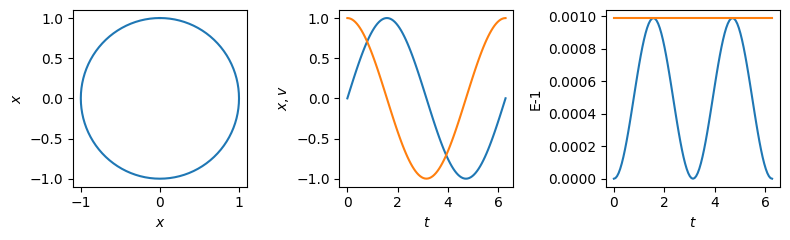

In [6]:
nsteps = 100
dt = 2*np.pi / nsteps
t = np.arange(nsteps+1)*dt
x, v = leapfrog(nsteps, dt, 0, 1)
E = x**2 + v**2
E1 = x**2 + v**2 / (1-dt**2/4)
print(nsteps, np.max(np.abs(E-1)), E1[-1]-1)

fig = plt.figure(figsize=(8,2.5))
plt.subplot(131)
plt.plot(x, v)
plt.xlabel(r'$x$')
plt.ylabel(r'$x$')

plt.subplot(132)
plt.plot(t,x)
plt.plot(t,v)
plt.xlabel(r'$t$')
plt.ylabel(r'$x, v$')

plt.subplot(133)
plt.plot(t,E-1)
plt.plot(t,E1-1)
plt.xlabel(r'$t$')
plt.ylabel(r'E-1')

plt.tight_layout()
plt.show()

The plot on the right shows that whereas the energy oscillates up and down over a cycle, the pseudo-Hamiltonian remains constant as expected.

(c) Look at the scaling:  (the original wording of the question had a typo, we need to look at the scaling for 1/2 and 1/4 of a cycle not 1 and 1/2 cycles)

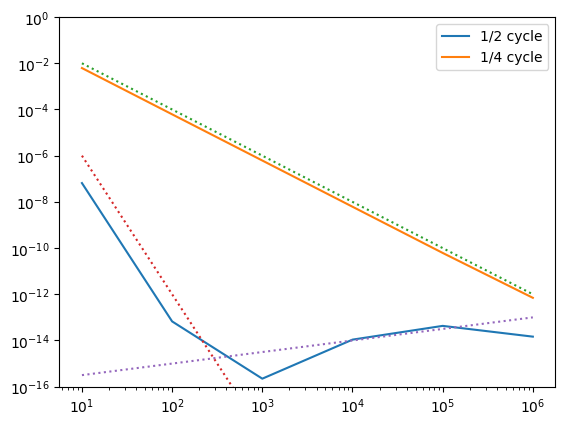

In [7]:
nsteps = 10**np.linspace(1,6,6, dtype = 'int')

Evec = np.array([])
E1vec = np.array([])

for n in nsteps:
    dt = 0.5 * np.pi / n
    x, v = leapfrog(n, dt, 0, 1)
    E = x**2 + v**2
    x, v = leapfrog(n, dt, x[-1], v[-1])
    E1 = x**2 + v**2
    Evec = np.append(Evec, abs(E[-1]-1))
    E1vec = np.append(E1vec, abs(E1[-1]-1))

plt.plot(nsteps, E1vec, label="1/2 cycle")
plt.plot(nsteps, Evec, label="1/4 cycle")
plt.plot(nsteps, 1/nsteps**2,':')
plt.plot(nsteps, 1/nsteps**6,':')
plt.plot(nsteps, 1e-16*nsteps**0.5,':')
plt.ylim((1e-16, 1))
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

For 1/2 a cycle, the energy error is $\propto 1/N^6$, whereas for 1/4 of a cycle we find $\propto 1/N^2$. In our expression for $\Delta H$ above, averaging over an orbit will leave only the $h^6$ term, so the $N^6$ scaling makes sense. Over 1/4 of an orbit, we don't get the averaging effect. The largest error term is $\propto h^3$ (local error), which then accumulates over the integration (global error) to give an $N^2$ scaling. 

## Eigenvalue problem for the wave on a string

Write the difference equation as

$$f_{i-1} -2f_i + f_{i+1} = - h^2 \omega^2 \rho_i f_i,$$

which is of the form

$$\mathbf{A}\cdot\mathbf{f} = \omega^2 \mathbf{b}\cdot\mathbf{f}.$$

We can solve this using [`scipy.linalg.eigh`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html#scipy.linalg.eigh). We take advantage of the ability of `scipy.linalg.eigh` to solve a "generalized eigenvalue problem" so we can pass it the $\mathbf{b}$ vector directly.

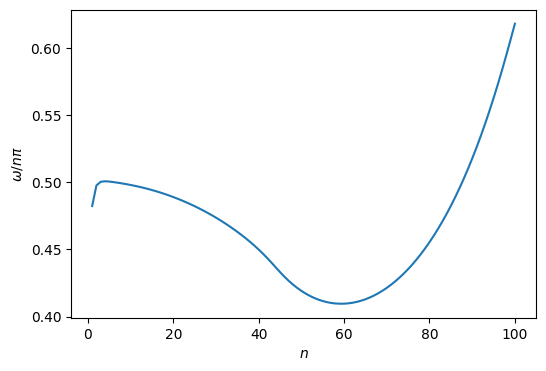

<Figure size 640x480 with 0 Axes>

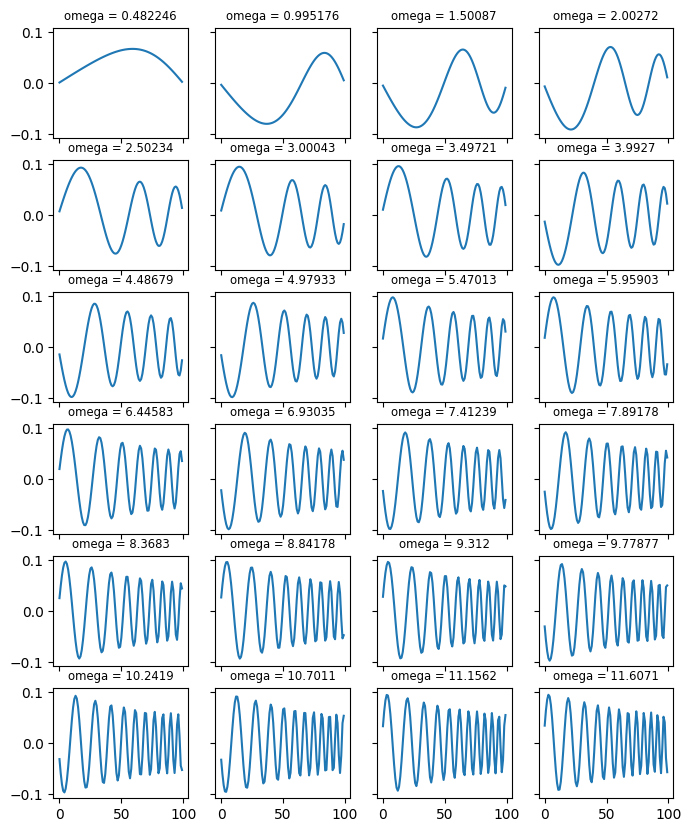

In [8]:
n = 100
x = np.linspace(0,1,n)
h = x[1]-x[0]  # grid spacing
h2 = h**2

#rho = np.ones(n)
rho = 1 + 10*x**2

A = np.diag(2*np.ones(n), k=0) + np.diag(-np.ones(n-1),k=-1) + np.diag(-np.ones(n-1),k=1)
w2, v = scipy.linalg.eigh(A, b=np.diag(rho))

w2 = w2 / h**2
w=np.sqrt(w2)/np.pi

i = np.arange(len(w)) + 1
plt.figure(figsize=(6,4))
plt.plot(i, w/i)
plt.ylabel(r'$\omega/n\pi$')
plt.xlabel(r'$n$')
plt.show()
plt.clf()

# Note that the n-th eigenvector is given by v[:, n-1] (not v[n-1]!)
fig, ax = plt.subplots(6, 4, sharex='all', sharey='all', figsize=(8,10))
for i in range(24):
    ax[i//4, i%4].plot(np.arange(len(v[:,i])), v[:,i])
    ax[i//4, i%4].set_title("omega = %lg" % (w[i]), fontsize='small')


## Electromagnetic wave

Using matplotlib backend: <object object at 0x105d33180>


2023-11-27 09:51:29.019 Python[66677:4945681] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


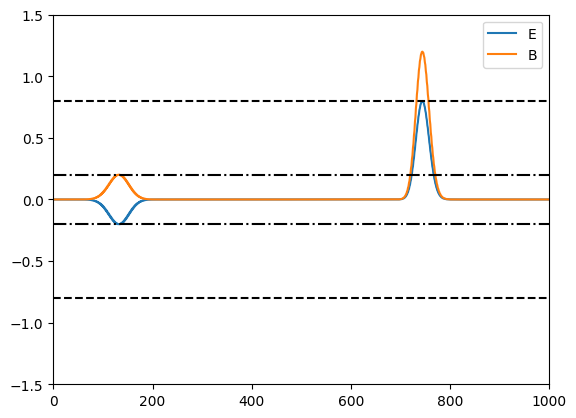

In [9]:
ngrid = 1001
x = np.arange(ngrid)

# refractive indices 
n1 = 1.0
n2 = 1.5

# alpha = dt/dx
alpha = 1.0/ max(n1,n2)

# initial wavepacket
E0 = np.ones(ngrid)
#E0 = np.sin(2.0 * np.pi * x / 20)
E0 = E0 * np.exp(-(x-ngrid//6)**2/800)

# refractive index array
n = np.ones(ngrid)   # set all n = 1
n[ngrid//2:] = n2
n[:ngrid//2] = n1

# set the B field to be nE so the wave propagates to the right
# (-nE will go left)
B0 = E0 * n

# arrays for E and B
Ep = np.copy(E0)
Bp = np.copy(B0)
# do a first order step
E = Ep - alpha * (np.roll(Bp,-1) - np.roll(Bp,1)) / 2.0 /  n**2
B = Bp - alpha * (np.roll(E,-1) - np.roll(E,1)) / 2.0
Enew = np.copy(E)
Bnew = np.copy(B)

# number of iterations
niter = int(0.7 * ngrid / alpha)

# set up plots and plot the starting profile
%matplotlib
plt.ion()
plt.plot(x,E,"C0:")
plt.plot(x,B,"C1:")
plt.plot([ngrid//2,ngrid//2],[-1.5,1.5], 'k', alpha=0.2, lw=2)
dat, = plt.plot(x, E, 'C0')
dat2, = plt.plot(x, B, 'C1')
plt.ylim((-1.5,1.5))
plt.xlim((x[0],x[-1]))
plt.show()

for k in range(niter):
   
    Enew = Ep - alpha * (np.roll(B,-1) - np.roll(B,1)) /  n**2
    Bnew = Bp - alpha * (np.roll(E,-1) - np.roll(E,1))
        
    # draw the updated data
    dat.set_ydata(Enew)
    dat2.set_ydata(Bnew)
    plt.draw()
    plt.pause(1e-3)

    Ep[:] = E[:] 
    E[:] = Enew[:]
    Bp[:] = B[:] 
    B[:] = Bnew[:]

plt.ioff()
plt.close()

%matplotlib inline
plt.plot(x, E, label='E')
plt.plot(x, B, label='B')
plt.ylim((-1.5,1.5))
plt.xlim((x[0],x[-1]))

# plot the analytic reflection and transmission coeffs
r = abs((n2-n1)/(n2+n1))
t = 2 * n1 / (n2+n1)
plt.plot([0,1000],[r,r],'k-.')
plt.plot([0,1000],[t,t],'k--')
plt.plot([0,1000],[-r,-r],'k-.')
plt.plot([0,1000],[-t,-t],'k--')

plt.legend()

plt.show()

The dot-dashed and dashed lines show the expected amplitudes of the reflected and transmitted waves.